In [133]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plts
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn import model_selection
from sklearn import linear_model, metrics

votes_file = '../assets/datasets/votes.csv'
airport_file = '../assets/datasets/Airport_operations.csv'

In [35]:
%matplotlib inline

# Case #1: Congressional Voting Data

After you've downloaded the data from the repository, go ahead and load it with Pandas

In [84]:
vote_df = pd.read_csv(votes_file).iloc[:,1:]

In [85]:
vote_df.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


Next, let's define the x and y variables: 

In [86]:
vote_df.replace("n", 0, inplace=True)
vote_df.replace("y", 1, inplace=True)

In [87]:
# Assumption: if values are NaN, treat as 0
vote_df.fillna(0, inplace=True)

In [88]:
X = vote_df[[i for i in vote_df.columns if "V" in i]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
y = vote_df["Class"]

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [90]:
cov_mat = np.cov(X_scaled.T)

In [91]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

Now, let's check the eigenvalues: 

In [92]:
eigenvalues

array([ 7.102243  ,  1.44867882,  1.1998064 ,  0.88126251,  0.8248454 ,
        0.7380054 ,  0.14086407,  0.21188391,  0.61036665,  0.27622346,
        0.31858994,  0.35967328,  0.41340487,  0.54030753,  0.51431461,
        0.45639653])

And the eigenvectors: 

In [93]:
eigenvectors[:2]

array([[-0.18803934, -0.19357121,  0.07328808,  0.51751543,  0.35845006,
         0.62089874, -0.05713493, -0.00747574,  0.15602045, -0.03613906,
        -0.07010134, -0.20296072,  0.12290505,  0.07348099,  0.20525446,
        -0.04760145],
       [ 0.05231849, -0.5860793 , -0.23045319,  0.37516036,  0.12646973,
        -0.55398342,  0.01855198, -0.10910015,  0.10486865,  0.0799821 ,
         0.0801356 , -0.13259865, -0.06581724,  0.07925709, -0.00808044,
         0.26963501]])

To find the principal componants, find the eigenpairs, and sort them from highest to lowest. 

In [94]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i,_ in enumerate(eigenvalues)]

In [95]:
eigenpairs.sort(reverse=True)

In [96]:
eigenpairs[:5]

[(7.1022429960917224,
  array([-0.18803934,  0.05231849, -0.29660826,  0.31510691,  0.33401889,
          0.26716267, -0.29182075, -0.32681104, -0.29287877,  0.01359228,
         -0.07112483,  0.28929338,  0.27553751,  0.28769832, -0.24744034,
         -0.07138452])),
 (1.4486788186332433,
  array([-0.19357121, -0.5860793 , -0.08013044,  0.1422561 , -0.0385968 ,
         -0.07972083,  0.19643052,  0.0725546 ,  0.18058669,  0.37071451,
         -0.4880378 ,  0.15955659, -0.06114016,  0.14238328, -0.0173265 ,
          0.28757258])),
 (1.1998063964339241,
  array([ 0.07328808, -0.23045319, -0.16884543,  0.07340739, -0.02237429,
         -0.25992991, -0.04588376, -0.07536811, -0.00924878, -0.57391342,
         -0.44655414,  0.01496153, -0.14476793, -0.13711492, -0.01321806,
         -0.51258496])),
 (0.88126250977162979,
  array([ 0.51751543,  0.37516036, -0.01308925,  0.13936979,  0.09559165,
         -0.19341153,  0.09917934,  0.00111245,  0.03611105, -0.15274865,
         -0.38257418, 

Now, calculate the explained variance. Recall the methods we learned in lesson 2.2!

Now, calculate the explained variance and the Cumulative explained variance

In [97]:
tot = sum(eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[ 44.286975    53.32040327  60.80195465  66.29718352  71.44061604
  76.04254625  79.84856815  83.21772715  86.42480392  89.27072481
  91.8485655   94.09135577  96.07796544  97.80039334  99.12162345 100.        ]


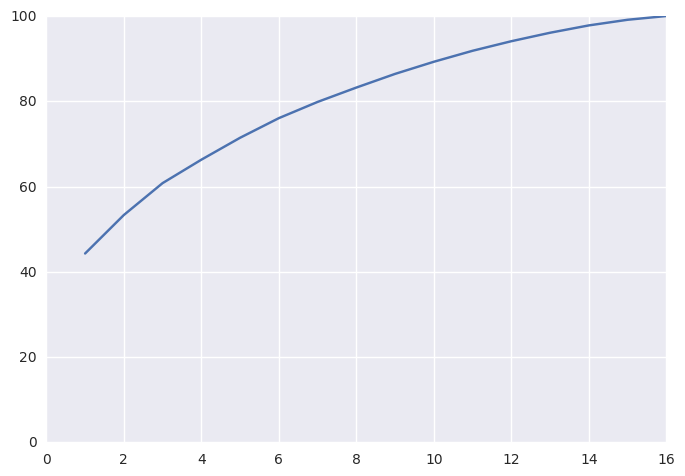

In [98]:
plt.plot(range(1,len(cum_var_exp)+1), cum_var_exp);
plt.ylim(0,100);

Now, conduct a PCA using scikit learn

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [39]:
p = PCA(n_components=5)

In [40]:
X_decomposed = p.fit_transform(X_scaled)

In [45]:
p.components_

array([[-0.18803934,  0.05231849, -0.29660826,  0.31510691,  0.33401889,
         0.26716267, -0.29182075, -0.32681104, -0.29287877,  0.01359228,
        -0.07112483,  0.28929338,  0.27553751,  0.28769832, -0.24744034,
        -0.07138452],
       [ 0.19357121,  0.5860793 ,  0.08013044, -0.1422561 ,  0.0385968 ,
         0.07972083, -0.19643052, -0.0725546 , -0.18058669, -0.37071451,
         0.4880378 , -0.15955659,  0.06114016, -0.14238328,  0.0173265 ,
        -0.28757258],
       [ 0.07328808, -0.23045319, -0.16884543,  0.07340739, -0.02237429,
        -0.25992991, -0.04588376, -0.07536811, -0.00924878, -0.57391342,
        -0.44655414,  0.01496153, -0.14476793, -0.13711492, -0.01321806,
        -0.51258496],
       [-0.51751543, -0.37516036,  0.01308925, -0.13936979, -0.09559165,
         0.19341153, -0.09917934, -0.00111245, -0.03611105,  0.15274865,
         0.38257418,  0.04203207, -0.12948346, -0.00581328,  0.29871419,
        -0.48647494],
       [ 0.35845006,  0.12646973,  0

# Case #2: Airport Delays

In [99]:
airport_df = pd.read_csv(airport_file)

In [100]:
airport_df.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


First, let's define the x and y variables: Airport is going to be our target variable

In [101]:
le = LabelEncoder()
y = le.fit_transform(airport_df["airport"])

In [102]:
X = airport_df.iloc[:,1:]

Then, standardize the x variable for analysis

In [103]:
scaler = StandardScaler()

In [104]:
X_scaled = scaler.fit_transform(X)

Next, create the covariance matrix from the standardized x-values and decompose these values to find the eigenvalues and eigenvectors

In [105]:
cov_mat = np.cov(X_scaled.T)

Then, check your eigenvalues and eigenvectors:

In [106]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

To find the principal components, find the eigenpairs, and sort them from highest to lowest. 

In [107]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i,_ in enumerate(eigenvalues)]

Next, Calculate the explained variance

In [108]:
tot = sum(eigenvalues)
var_exp = [ (i/tot * 100) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

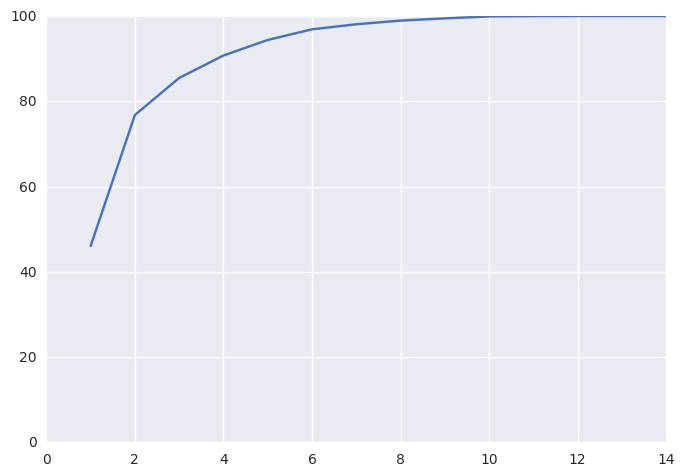

In [109]:
plt.plot(np.arange(1,len(cum_var_exp)+1), cum_var_exp);
plt.ylim(0,100);

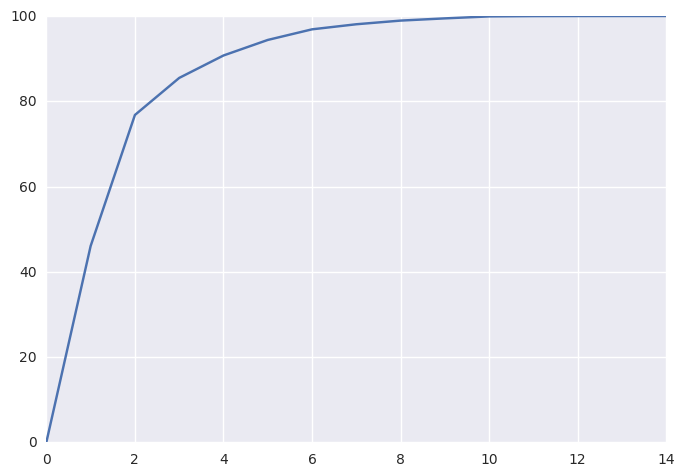

In [110]:
test = [0]
test.extend(cum_var_exp)
plt.plot(test);

Finally, conduct the PCA - use the results above to guide your selection of n components

In [114]:
W = np.hstack((eigenpairs[0][1].reshape(len(eigenpairs),1), 
              eigenpairs[1][1].reshape(len(eigenpairs),1)))

In [115]:
W

array([[-0.05747614,  0.05252557],
       [ 0.11683294, -0.41190929],
       [ 0.1164079 , -0.41158191],
       [-0.31455588, -0.25353041],
       [-0.37512831, -0.07870829],
       [-0.31944346, -0.25961871],
       [ 0.3394426 ,  0.21205574],
       [ 0.20370273, -0.35157249],
       [ 0.17921314, -0.36563423],
       [ 0.38208105,  0.04418206],
       [ 0.26636432, -0.1225854 ],
       [ 0.11754539, -0.4016139 ],
       [ 0.292669  , -0.0920439 ],
       [ 0.3500623 ,  0.17689915]])

In [116]:
Z = X_scaled.dot(W)

**Bonus**: build and contrast classification models to predict the target classes for each problem, using both the original (or n-best) features and the principal components. If you arrive at <= 3-dimensional feature space, try plotting your data!

In [135]:
def fit_model(model, name,  X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print "{} Score: {:.2f}".format(name, score)
    
    return model, y_pred
    
def evaluate_model(model, name, X, y):
    print name
#     try:
    # set X and y
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, 
                                                                  test_size=0.3, random_state=77)

    # fit the model
    model, y_pred = fit_model(model, name, X_train, X_test, y_train, y_test)

    # confusion matrix
    conmat = metrics.confusion_matrix(y_test, y_pred)
    conmat = pd.DataFrame(conmat)
    conmat

    # classification report
    print metrics.classification_report(y_test, y_pred)

    # plotting
#     try:
#         y_score = model.decision_function(X_test)
#     except:
#         y_score = model.predict_proba(X_test)[:,1]

#     fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
#     plt.plot(fpr,tpr);
#     plt.title("{}\nROC curve".format(name));
#     plt.ylim((-0.1, 1.1));
#     plt.xlim((-0.1, 1.1));
#     plt.xlabel("FPR");
#     plt.ylabel("TPR");
#     plt.text(0.8,0.05,"AUC: {:0.2f}".format(metrics.roc_auc_score(y_test, y_score)));

    return model, conmat, X, y
#     except:
#         return "Wrong type"

In [136]:
logreg = evaluate_model(linear_model.LogisticRegressionCV(), "Logistic Regression", pd.DataFrame(Z), y)

Logistic Regression
Logistic Regression Score: 0.06
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         3
          1       0.00      0.00      0.00         4
          2       0.38      1.00      0.55         3
          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         4
          7       0.00      0.00      0.00         4
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         4
         11       0.00      0.00      0.00         4
         12       0.00      0.00      0.00         3
         13       0.00      0.00      0.00         3
         14       0.00      0.00      0.00         4
         15       0.00      0.00      0.00         4
         16       0.00      0.00      0.00    